In [74]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt


In [75]:
from keras import backend as K
print(K.backend())

tensorflow


CIFAR-10 Luokitteluprojekti
Projektin tavoite
Tämän ryhmäprojektin tarkoituksena on soveltaa neuroverkkotekniikoita CIFAR-10 kuvaluokitteluongelmaan. Tavoitteena on vertailla kahta erilaista neuroverkkoarkkitehtuuria: täysin yhdistettyä verkkoa (FCN) sekä konvoluutioneuroverkoa (CNN).

Tehtävänanto
Toteuta CIFAR-10 datasetin luokittelu kahdella erillisellä Jupyter Notebookilla:

Käytä täysin yhdistettyä neuroverkkoa (Fully Connected Network, FCN)
Käytä konvoluutioneuroverkkoa (Convolutional Neural Network, CNN)
Voit käyttää mallina ja pohjana MNIST-datasetille tehtyjä työkirjoja:

MNIST_Keras.ipynb
MNIST_Keras_CNN.ipynb
https://github.com/mikkopere/Neuroverkkoprojekti

Vertaile näiden mallien:

Suorituskykyä (tarkkuus testidatalla)
Oppimiskäyrää (training vs. validation loss)
Parametrien määrää
Opetusaikaa
Visualisoi tuloksia:

Näytä esimerkkikuvia ja mallien luokittelutuloksia
Esitä luokkien todennäköisyysjakaumia
Analysoi väärin luokiteltuja kuvia
Ideoita kokeiltavaksi:

Kokeile erilaisia esikäsittelytekniikoita värikuville
Testaa erilaisia verkkoarkkitehtuureja (kerrosten määrä, neuronien määrä)
Kokeile regularisointitekniikoita (dropout, batch normalization)
Tutki data-augmentation -tekniikoiden vaikutusta
Analysoi miksi CNN yleensä toimii paremmin kuvadatalle kuin FCN. Kuinka suureen tarkkuuteen pääset ei malleilla. Realistiset ja toisaalta kunnianhimoiset tavoitteet eli malleilla voisivat olla:

Fully Connected Network (FCN):

realistinen tavoite 50-55 % tarkkuus
kunnianhmoinen tavoite 57-60 % tarkkuus

Convolutional Neural Network (CNN):

realistinen tavoite 75-80 % tarkkuus
kunnianhimoinen tavoite 82-85 % tarkkuus

In [76]:
keras.datasets.cifar10.load_data()
num_classes = 10

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

names = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 
         4: "deer", 5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [77]:
# Create the model
inputs = keras.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [78]:
model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
batch_size = 512
epochs = 30

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.2265 - loss: 2.1094 - val_accuracy: 0.4070 - val_loss: 1.6403
Epoch 2/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.4235 - loss: 1.6115 - val_accuracy: 0.5058 - val_loss: 1.4332
Epoch 3/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.4812 - loss: 1.4618 - val_accuracy: 0.5370 - val_loss: 1.3416
Epoch 4/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.5164 - loss: 1.3711 - val_accuracy: 0.5490 - val_loss: 1.3042
Epoch 5/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.5313 - loss: 1.3345 - val_accuracy: 0.5708 - val_loss: 1.2421
Epoch 6/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.5540 - loss: 1.2736 - val_accuracy: 0.5914 - val_loss: 1.1977
Epoch 7/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.5671 - loss: 1.2401 - val_accuracy: 0.6060 - val_loss: 1.1625
Epoch 8/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.5817 - loss: 1.2080 - val_accuracy: 0.6032 - v

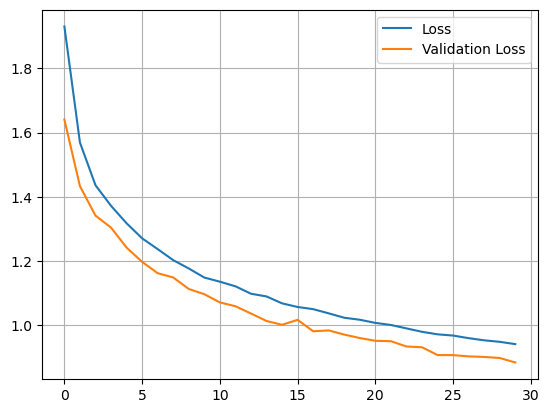

In [80]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()
plt.show()

In [81]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.9019247889518738
Test accuracy: 0.6919999718666077


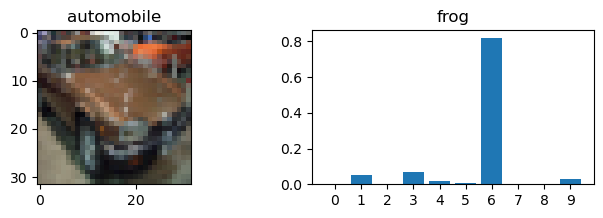

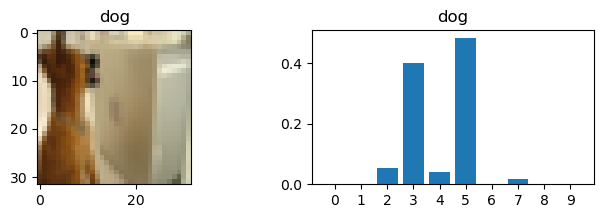

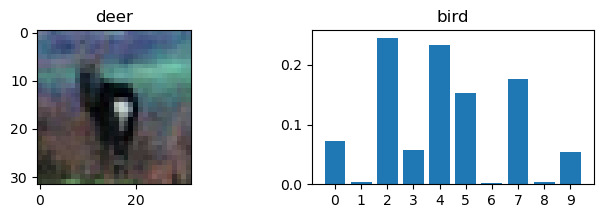

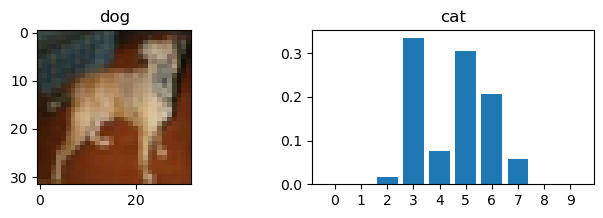

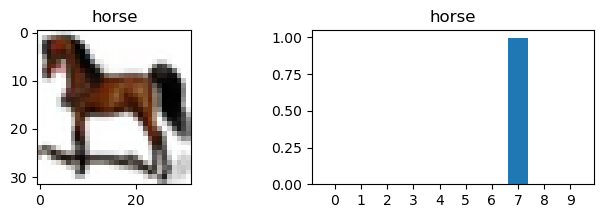

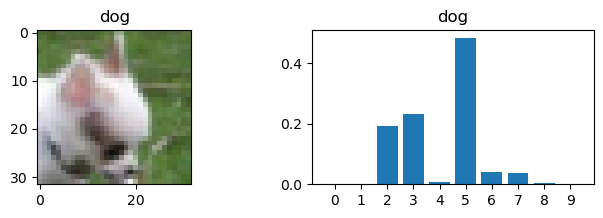

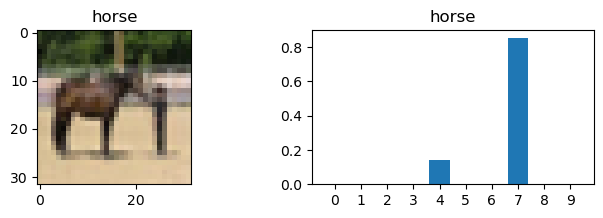

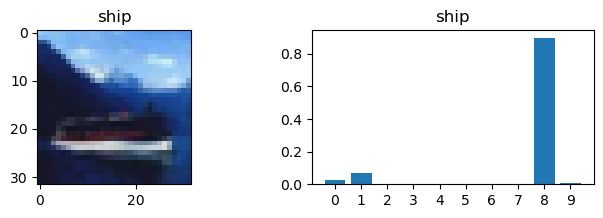

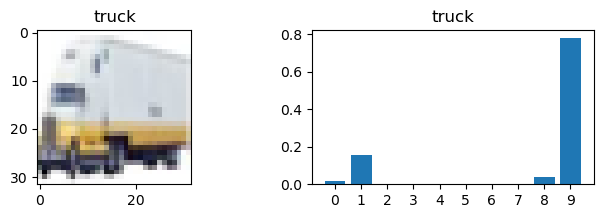

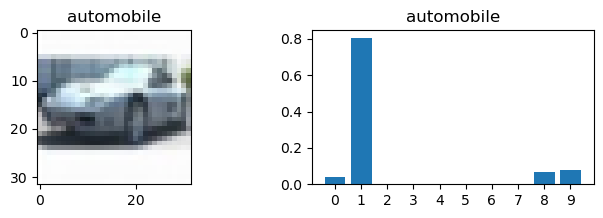

In [82]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 2))
    plt.subplot(1,2,1)
  
    plt.title(names[np.argmax(y_test[start+k])])
    plt.imshow(x[start+k])
    
    if x_test.shape[1] == 3072:
        x_test = x_test.reshape(-1, 32, 32, 3)
        
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    
    #plt.bar(ind, y[start+k].cpu().detach().numpy().flatten())   # Pytorch
    plt.bar(ind, y[start+k].numpy().flatten()) 
    
   # Find the predicted class with the highest probability
    predicted_class_index = np.argmax(y[start + k].numpy())  # Index of highest probability
    predicted_class = names[predicted_class_index] 
    
     # Set the title as the predicted class
    plt.title(predicted_class)
    
    # Tensorflow
    plt.xticks(range(10))